<a href="https://colab.research.google.com/github/AviralTripathim22ma012/Advanced_Techniques_in_computer_vision/blob/main/eigen_faces_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EIGEN-FACES FROM SCRATCH USING NUMPY AND PCA**

**reesizing all the images to 32*32, and storing them in the folder 'train_resized'**

In [ ]:
#rsizing all the images in the face-lfw-train folder to 250*250, and saving them into the foolder "train"

import os
import cv2

'''# Set the path of the input folder and the output folder'''
input_folder = '/content/drive/MyDrive/data.zip (Unzipped Files)/face-lfw-train'
train_resized = '/content/drive/MyDrive/data.zip (Unzipped Files)/train_resized'

'''# Create the output folder if it doesn't exist'''
if not os.path.exists(train_resized):
    os.makedirs(train_resized)

'''# Loop through all the files in the input folder'''
for filename in os.listdir(input_folder):
    '''# Check if the file is an image'''
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        '''# Load the image'''
        img = cv2.imread(os.path.join(input_folder, filename))
        '''# Resize the image'''
        resized = cv2.resize(img, (32, 32))
        '''# Save the resized image to the output folder'''
        cv2.imwrite(os.path.join(train_resized, filename), resized)


**computing eigen faces using 10 PCA components, and displaying eigen-afces for k= [1, 2, 5, 10]**

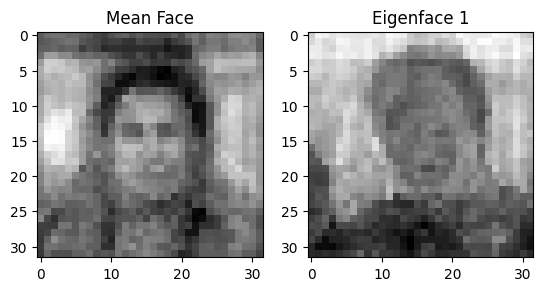

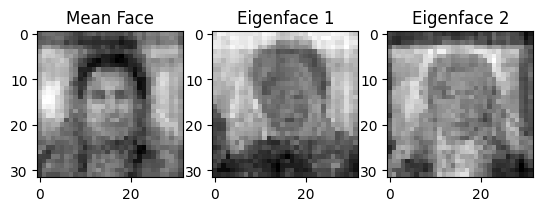

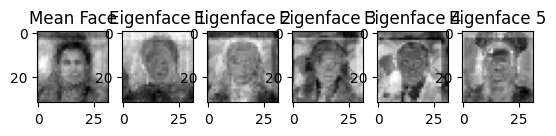

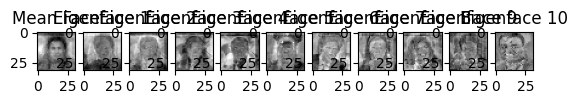

In [ ]:
import numpy as np
import os
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

'''# Define the path to the image directory'''
path = "/content/drive/MyDrive/data.zip (Unzipped Files)/train_resized"

'''# Load the images and store them in a list'''
images = []
for file in os.listdir(path):
    image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32)) # Resize the image to reduce resource usage
    images.append(image)

'''# Convert the list of images into a 2D array'''
X = np.array(images).reshape(len(images), -1)

'''# Compute the mean face'''
mean_face = np.mean(X, axis=0)

'''# Subtract the mean face from each image'''
X = X - mean_face

'''# Compute the eigenvectors and eigenvalues using PCA'''
pca = PCA(n_components=10)
pca.fit(X)
eigenfaces = pca.components_

'''# Plot the mean face and the top k eigenfaces'''
k_values = [1, 2, 5, 10]
for k in k_values:
    '''# Reconstruct the faces using the top k eigenfaces'''
    eigenfaces_k = eigenfaces[:k, :]
    weights = np.dot(X, eigenfaces_k.T)
    reconstructed_faces = np.dot(weights, eigenfaces_k) + mean_face

    '''# Plot the mean face and the top k eigenfaces'''
    fig, ax = plt.subplots(1, k+1)
    ax[0].imshow(mean_face.reshape(32, 32), cmap="gray")
    ax[0].set_title("Mean Face")
    for i in range(k):
        ax[i+1].imshow(eigenfaces_k[i, :].reshape(32, 32), cmap="gray")
        ax[i+1].set_title("Eigenface {}".format(i+1))
    plt.show()
    print(" ")
    print(" ")


**displayinng the reconstructed face, along with recontruction error**

Reconstruction error for k = 1: 13629.7545
 


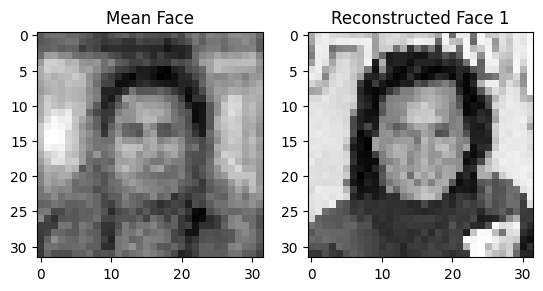

 
 
Reconstruction error for k = 2: 13629.7545
 
 


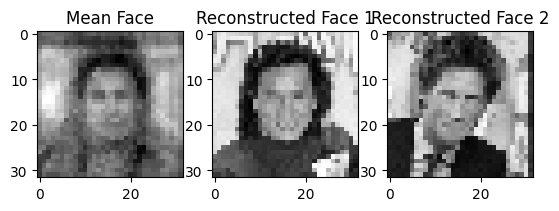

 
 
Reconstruction error for k = 5: 13629.7545
 
 
 
 
 


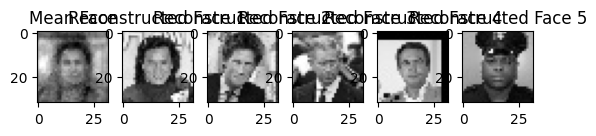

 
 
Reconstruction error for k = 10: 13629.7545
 
 
 
 
 
 
 
 
 
 


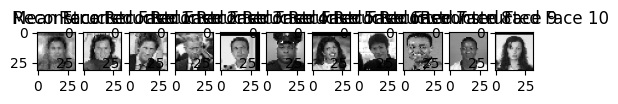

In [ ]:
'''# Plot the mean face and the top k eigenfaces'''

k_values = [1, 2, 5, 10]
for k in k_values:

    '''# Calculate the reconstruction error'''
    mse = np.mean(np.square(X - reconstructed_faces))
    print("Reconstruction error for k = {}: {:.4f}".format(k, mse))

    '''# Display the reconstructed faces'''
    fig, ax = plt.subplots(1, k+1)
    ax[0].imshow(mean_face.reshape(32, 32), cmap="gray")
    ax[0].set_title("Mean Face")
    for i in range(k):
        ax[i+1].imshow(reconstructed_faces[i, :].reshape(32, 32), cmap="gray")
        print(" ")
        ax[i+1].set_title("Reconstructed Face {}".format(i+1))
    plt.show()
    print(" ")
    print(" ")


In [ ]:
#errors before normalization
k_values = [1, 2, 5, 10]
for k in k_values:

    '''# Calculate the reconstruction error'''
    mse = np.mean(np.square(X - reconstructed_faces))
    print("Reconstruction error for k = {}: {:.4f}".format(k, mse))

Reconstruction error for k = 1: 13629.7545
Reconstruction error for k = 2: 13629.7545
Reconstruction error for k = 5: 13629.7545
Reconstruction error for k = 10: 13629.7545


**reconstruction error with normalisation**

In [ ]:
import numpy as np
import os
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

'''# Define the path to the image directory'''
path = "/content/drive/MyDrive/data.zip (Unzipped Files)/train_resized"

'''# Load the images and store them in a list'''
images = []
for file in os.listdir(path):
    image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32)) # Resize the image to reduce resource usage
    images.append(image)

'''# Convert the list of images into a 2D array'''
X = np.array(images).reshape(len(images), -1)

'''# Compute the mean face'''
mean_face = np.mean(X, axis=0)

'''# Subtract the mean face from each image'''
X = X - mean_face

'''#normalisation'''
X = X / 255.0

'''# Compute the eigenvectors and eigenvalues using PCA'''
pca = PCA(n_components=10)
pca.fit(X)
eigenfaces = pca.components_

'''# Plot the mean face and the top k eigenfaces'''
k_values = [1, 2, 5, 10]
for k in k_values:
    '''# Reconstruct the faces using the top k eigenfaces'''
    eigenfaces_k = eigenfaces[:k, :]
    weights = np.dot(X, eigenfaces_k.T)
    reconstructed_faces = np.dot(weights, eigenfaces_k) + mean_face

    mse = np.mean(np.square(X - reconstructed_faces))
    print("Reconstruction error for k = {}: {:.4f}".format(k, mse))


Reconstruction error for k = 1: 13629.7994
Reconstruction error for k = 2: 13629.7906
Reconstruction error for k = 5: 13629.7686
Reconstruction error for k = 10: 13629.7545
